## Solving the "banknote authentication" problem

0 iteration with fitness = 0.08097553228202942
50 iteration with fitness = 0.027431499106993096
100 iteration with fitness = 0.023399716005236677
150 iteration with fitness = 0.01855901955735908
200 iteration with fitness = 0.013681545345318766
confusion_matrix: 
 [[228   0]
 [  1 181]]
f1_score: 
 0.9975284976279605


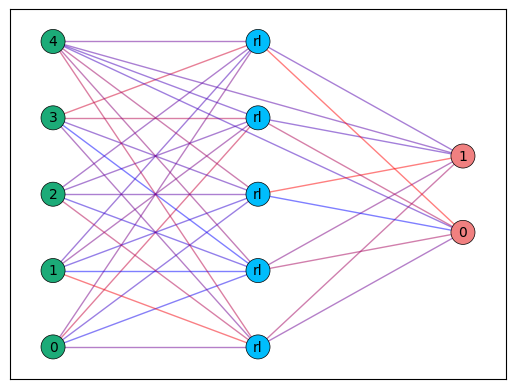

In [23]:
import numpy as np



from thefittest.optimizers import SHADE
from thefittest.benchmarks import BanknoteDataset
from thefittest.classifiers import MLPEAClassifier
from thefittest.tools.transformations import scale_data
from thefittest.tools.random import train_test_split_stratified
from thefittest.tools.metrics import confusion_matrix
from thefittest.tools.metrics import f1_score
from thefittest.tools.print import print_net


data = BanknoteDataset()
X = data.get_X()
y = data.get_y()

X_scaled = scale_data(X)

X_train, X_test, y_train, y_test = train_test_split_stratified(
    X_scaled, y, tests_size=0.3)

model = MLPEAClassifier(iters=250,
                        pop_size=250,
                        hidden_layers=(5,),
                        activation="relu",
                        weights_optimizer=SHADE,
                        weights_optimizer_args={"show_progress_each": 50})

model.fit(X_train, y_train)

predict = model.predict(X_test)

print("confusion_matrix: \n", confusion_matrix(y_test, predict))
print("f1_score: \n", f1_score(y_test, predict))

print_net(net = model._net) # the "4" node is offset

## modeling of the "sin" function

0 iteration with fitness = 0.5955748608272344
50 iteration with fitness = 0.4908263094666595
100 iteration with fitness = 0.4908263094666595
150 iteration with fitness = 0.4760066969427584
200 iteration with fitness = 0.46697828912909495
coefficient_determination: 
 0.3516863478795974


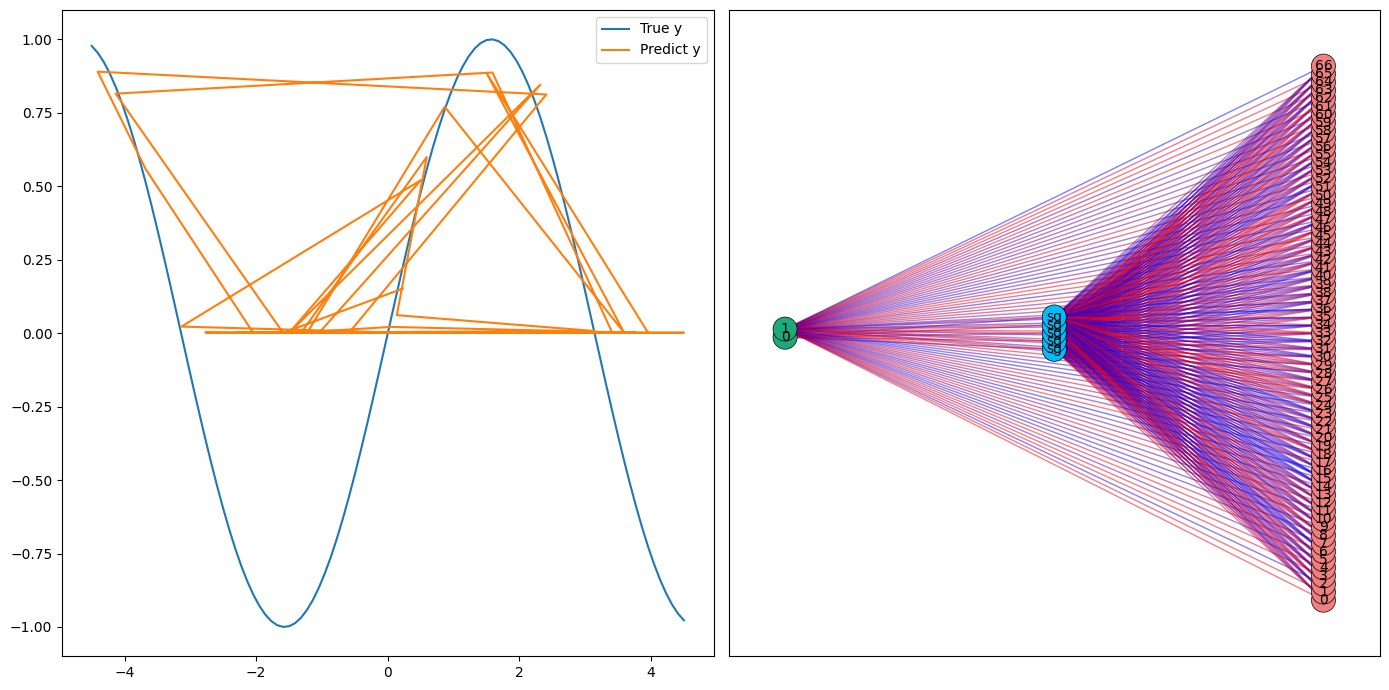

In [27]:
import matplotlib.pyplot as plt

from thefittest.regressors import MLPEARegressor
from thefittest.tools.metrics import coefficient_determination
from thefittest.tools.random import train_test_split
from thefittest.optimizers import SHAGA
from thefittest.tools.transformations import scale_data


def problem(x):
    return np.sin(x[:,0])


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 100
n_dimension = 1

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
X_scaled = scale_data(X)
y_scaled = scale_data(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 0.33)

model = MLPEARegressor(iters=250,
                       pop_size=250,
                       hidden_layers=(5,),
                       activation="sigma",
                       weights_optimizer=SHAGA,
                       weights_optimizer_args={"show_progress_each": 50})

model.fit(X_train, y_train)

predict = model.predict(X_test)

print("coefficient_determination: \n", coefficient_determination(y_test, predict))

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X_test[:,0], predict, label = "Predict y")
ax[0].legend()

print_net(net = model._net, ax = ax[1]) 

plt.tight_layout()
plt.show()
